This dataset lists all soccer players participating in the 2016 World Cup, their country's rank in the tournament, what club they played for, as well as other information. This file is in TSV format, so we begin by reading it in as a CSV but specifying the different delimiter. 

In [1]:
import pandas as pd

In [40]:
worldcup_df = pd.read_csv('C:\\Users\\michael.clawson\\Desktop\\Machine Learning\\worldcupplayerinfo_20140701.tsv',
 delimiter='\t', header=0)

In [32]:
worldcup_df.head()

,Group,Country,Rank,Jersey,Position,Age,Selections,Club,Player,Captain,Unnamed: 10,Unnamed: 11
0,A,Brazil,3,1,Goalie,31,9,Botafogo,Jefferson,0,NaN,NaN
1,A,Brazil,3,12,Goalie,34,80,Toronto FC,Julio Cesar,0,NaN,NaN
2,A,Brazil,3,22,Goalie,31,6,Atletico Mineiro,Victor,0,NaN,NaN
3,A,Brazil,3,2,Defender,31,75,Barcelona,Dani Alves,0,NaN,NaN
4,A,Brazil,3,13,Defender,30,12,Bayern Munich,Dante,0,NaN,NaN


The dataset has two superfluous columns at  the end, so we will begin cleaning by dropping these:

In [41]:
worldcup_df.drop(worldcup_df.columns[[10,11]], axis=1, inplace=True)

In [42]:
worldcup_df.head()

,Group,Country,Rank,Jersey,Position,Age,Selections,Club,Player,Captain
0,A,Brazil,3,1,Goalie,31,9,Botafogo,Jefferson,0
1,A,Brazil,3,12,Goalie,34,80,Toronto FC,Julio Cesar,0
2,A,Brazil,3,22,Goalie,31,6,Atletico Mineiro,Victor,0
3,A,Brazil,3,2,Defender,31,75,Barcelona,Dani Alves,0
4,A,Brazil,3,13,Defender,30,12,Bayern Munich,Dante,0


To get a feel for what is in the data, let us look at the number of observations as well as what different positions were logged. Ideally, this second piece of information could be converted into analyses about most common/peak ages for each position, regression on team ranking vs. mean team age, as well as regressing the size of the substitution pool for each team against their world cup rank. Also, it would be interesting to see which positions that the team captains tend to be selected from. However, I was unable to understand how to run the python equivalent of countif and sumif functions, so those insights are unavailable.

In [47]:
worldcup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
Group         736 non-null object
Country       736 non-null object
Rank          736 non-null int64
Jersey        736 non-null int64
Position      736 non-null object
Age           736 non-null int64
Selections    736 non-null int64
Club          736 non-null object
Player        736 non-null object
Captain       736 non-null object
dtypes: int64(4), object(6)
memory usage: 57.6+ KB


In [51]:
plist = worldcup_df.Position.unique()

In [52]:
print(plist)

['Goalie' 'Defender' 'Midfielder' 'Forward' 'Défenseur']


While the majority of the table below is uninteresting, the mean, minimum, and maximum ages are rather interesting insights.

In [48]:
worldcup_df.describe()

,Rank,Jersey,Age,Selections
count,736.000000,736.00000,736.000000,736.000000
mean,21.625000,12.00000,26.828804,33.368207
std,16.922573,6.63776,3.796961,30.608816
min,1.000000,1.00000,18.000000,0.000000
25%,8.750000,6.00000,24.000000,9.000000
50%,17.500000,12.00000,27.000000,24.000000
75%,29.250000,18.00000,29.000000,50.000000
max,62.000000,23.00000,42.000000,154.000000


In [56]:
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
sns.set(style='ticks', palette='Set2')
# shows graphs in notebook
%matplotlib inline

However, it seems that slightly older teams get ranked higher in the world cup, as shown by this regression line. While they are not old by any means, experience and talent are likely more highly prized than raw athletic ability generally displayed by younger players.

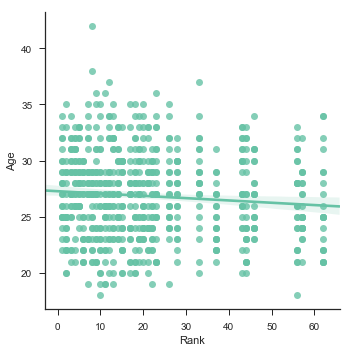

In [57]:
sns.lmplot(x="Rank", y="Age", data=worldcup_df)
